## GCP Composer Blog

##### Created By: Indranil Pal
##### Created Date: 01/12/2021

#### Ref:
##### GCP Composer: https://cloud.google.com/composer/docs/quickstart#airflow-1_1
##### DAGs: https://cloud.google.com/composer/docs/how-to/using/writing-dags
##### Airflow: https://airflow.apache.org/docs/apache-airflow/stable/concepts/index.html
##### Composer blog: https://www.qubole.com/tech-blog/apache-airflow-concepts-dag-scheduling-and-variables/

### Realtime Problems and Scenarios, why to use or consider GCP Composer:

### What is Composer?

##### Composer is a managed GCP service to create, manage, monitor and schedule workflows.

##### Workflow is a sequence of tasks.

##### It is based on open source Apache Airflow.

### Architechture of GCP Composer

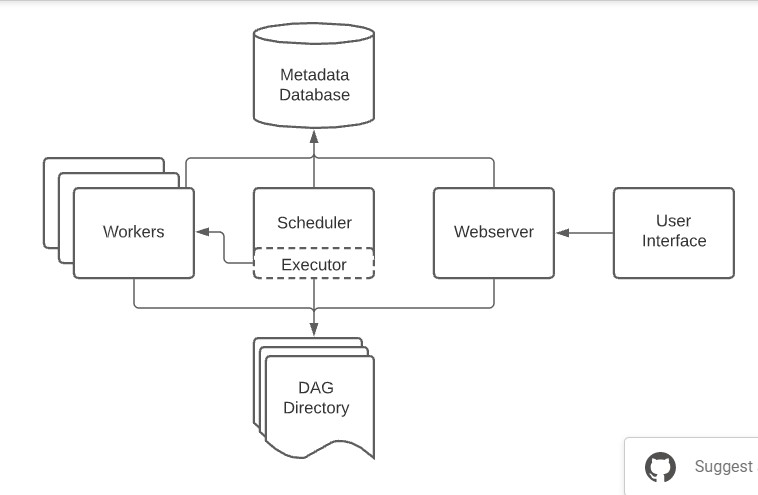

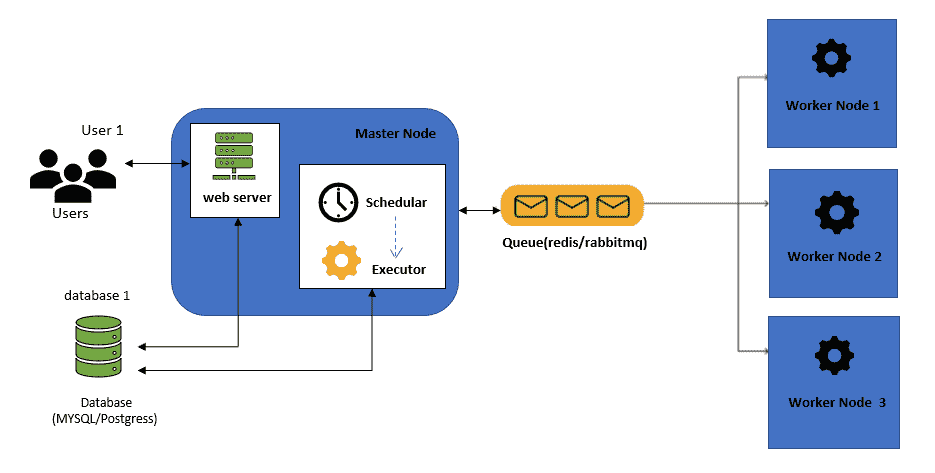

##### Scheduler: 
    1. Responsible for triggering the scheduled workflows and submit the tasks to executor to run
    2. Scheduler keeps pooling for tasks ( which tasks are ready to run, dependencies have met and scheduling is poosible) and queue them to the executor.


##### Executor: 
    is handling the running tasks. By defaults, everything runs inside scheduler but in production env, executors push these task execution to workers.

##### Webserver: 
    is a user interface, where end user can inspect, trigger, debug the DAGs/Tasks. Also we can check logs from here.
    
##### Metadata database: 
    Scheduler, Executor and Worker connects with the Database and store the state of the tasks and dags.

### Main Component of Composer -

##### DAG: 
    Directed Acyclic Graph. It is a series of tasks. It does organize the dependencies between the tasks.
    DAGs are designed to be run many times, and multiple runs of them can happen in parallel.
    
##### Task: 
    There are three types of tasks-
    
    1. Opearators - 
        predefined tasks and subclass of Airflow's BaseOperator. This is basically a template.
        
    2. Sensors -
        a special subclass of Operators which are entirely about waiting for an external event to happen
        
    3. Taskflows-decorated @task (custom Python function packaged as a task)
    


### Similar Composer services in GCP and when we need to consider GCP Composer 

#### Workflows Vs Composer -
##### Ref: https://cloud.google.com/workflows/docs/choose-orchestration

##### Workflows is faster, milisecond latency but its useful actually for Http based services, specially microservices.
##### Composer is used for ETL/ ETL job / data-driven workflows orchestrating, used for multi cloud / hybrid architecture and based on open source Apache Airflow

## DAG

### Step1: importing modules
### Step2: Specify Default Argument
### Step3: Instantiate a DAG
### Step4: Tasks
### Step5: Setting up dependencies

### Basic Code Snippet / Structure of DAG:

In [ ]:
import datetime
import airflow
from airflow import models
from airflow.operators import bash_operator
from airflow.operators import python_operator


start_date = datetime.datetime(2021, 1, 1) 
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)

default_args = {
    "owner": "indranil pal",
    "depends_on_past": False,
    "email": [""],
    "email_on_failure": False,
    "email_on_retries": False,
    "retries": 1,
    "retry_delay": datetime.timedelta(minutes=15),
    "start_date": start_date,
    "end_date": datetime.timedelta(days=1)
}

# Context Manager
with models.DAG(
    "Test_Dag",
    dafault_args = default_args,
    schedule_interval = datetime.timedelta(days=1)
) as dag:
    
    # Task with Python Operator
    def hello_python():
        import logging
        logging.info("Hello Python!!")
        
    task_python = python_operator.PythonOperator(
        task_id = "Hello Python",
        python_callable = hello_world)
    
    # Task with Bash Operator
    task_bash = bash_operator.BashOperator(
        task_id = "Hello Bash",
        bash_command = "echo hello bash!!")
    
    
    #task_python.set_downstream(task_bash)
    task_python >> task_bash
    

### Problems 

#### Failures: 
    retry if failure happens (how many times? how often?)
#### Monitoring: 
    success or failure status (how long the process runs?)

### Variables And Connections:

#### Variables: 
    Variables in Airflow are used to store and retrieve arbitrary content or simply json key-value  

### Control Flow -

#### customized using features like Branching, LatestOnly, and Trigger Rules.

### Trigger Rule:

#### Trigger Rule can be specified in the task and on that basis, scheduler decides whether to run the task or not. 
    all_success (default), all_failed, all_done, one_failed, one_success, none_failed, none_failed_or_skipped, none_skipped, dummy

### Below are some Trigger Rules

### To pass data between tasks you have two options:

1. XComs (“Cross-communications”), a system where you can have tasks push and pull small bits of metadata.

2. Uploading and downloading large files from a storage service (either one you run, or part of a public cloud)